# Game of Thrones battles Analytics
### Autor: Pablo Aguiar Raposo [linkedin](https://www.linkedin.com/in/pablo-aguiar-raposo-71b6b5139/)


# INTRODUÇÃO:


Olá! Neste projeto usei um dataset da minha série preferida para fazer um trabalho de análise de dados.

Insights encontrados nesse projeto:
. Quantidade de batalhas por ano;
. Quantidade de batalhas com captura/morte de personagens principais por ano;
. Quantidade de batalha em cada região;
. Quantidade de batalhas com captura/morte de personagens principais por região;
. Análise no impacto do tamanho dos exércitos no resultado de batalha;
. Análise do impacto do tipo de combate no resultado de batalha;
. Reis que mais atacaram;
. Reis que mais sofreram ataques;
. Confrontos mais frequentes;
. Quem mais ganhou batalhas;
. Quem mais perdeu batalhas.



Créditos pelo dataset: https://github.com/chrisalbon/war_of_the_five_kings_dataset


In [1]:
# Pacotes utilizados 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import matplotlib.patches as mpatches

warnings.filterwarnings('ignore')

In [2]:
# carregando o dataset
df = pd.read_csv("C:/Users/Pichau/Desktop/Data _science/projetos/GOT/battles.csv")
pd.set_option('display.max_columns', None)


In [3]:
# Parâmetros de plotagem
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [15., 6.]

# Análise exploratória

In [4]:
df.head(38)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN
6,Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Darry,NaN,NaN,NaN,win,pitched battle,0.0,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,1.0,Darry,The Riverlands,NaN
7,Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN,win,pitched battle,0.0,0.0,NaN,NaN,Victarion Greyjoy,NaN,1.0,Moat Cailin,The North,NaN
8,Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN,win,siege,0.0,0.0,1000.0,NaN,Asha Greyjoy,NaN,1.0,Deepwood Motte,The North,NaN
9,Battle of the Stony Shore,299,10,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN,win,ambush,0.0,0.0,264.0,NaN,Theon Greyjoy,NaN,1.0,Stony Shore,The North,Greyjoy's troop number based on the Battle of ...


In [5]:
df.shape

(38, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                38 non-null     object 
 1   year                38 non-null     int64  
 2   battle_number       38 non-null     int64  
 3   attacker_king       36 non-null     object 
 4   defender_king       35 non-null     object 
 5   attacker_1          38 non-null     object 
 6   attacker_2          10 non-null     object 
 7   attacker_3          3 non-null      object 
 8   attacker_4          2 non-null      object 
 9   defender_1          37 non-null     object 
 10  defender_2          2 non-null      object 
 11  defender_3          0 non-null      float64
 12  defender_4          0 non-null      float64
 13  attacker_outcome    37 non-null     object 
 14  battle_type         37 non-null     object 
 15  major_death         37 non-null     float64
 16  major_capt

In [7]:
df.nunique()

name                  38
year                   3
battle_number         38
attacker_king          4
defender_king          6
attacker_1            11
attacker_2             7
attacker_3             2
attacker_4             1
defender_1            12
defender_2             2
defender_3             0
defender_4             0
attacker_outcome       2
battle_type            4
major_death            2
major_capture          2
attacker_size         19
defender_size         14
attacker_commander    31
defender_commander    28
summer                 2
location              27
region                 7
note                   5
dtype: int64

In [8]:
df.isnull().sum()

name                   0
year                   0
battle_number          0
attacker_king          2
defender_king          3
attacker_1             0
attacker_2            28
attacker_3            35
attacker_4            36
defender_1             1
defender_2            36
defender_3            38
defender_4            38
attacker_outcome       1
battle_type            1
major_death            1
major_capture          1
attacker_size         14
defender_size         19
attacker_commander     1
defender_commander    10
summer                 1
location               1
region                 0
note                  33
dtype: int64

# Data Munging - tratando os dados capturados

In [9]:
# Excluindo colunas desnecessárias para a análise
df.drop(['battle_number','note'], axis=1, inplace=True)


Preenchendo os valores NaN das colunas 'atacker size' e 'defender size'

<AxesSubplot:>

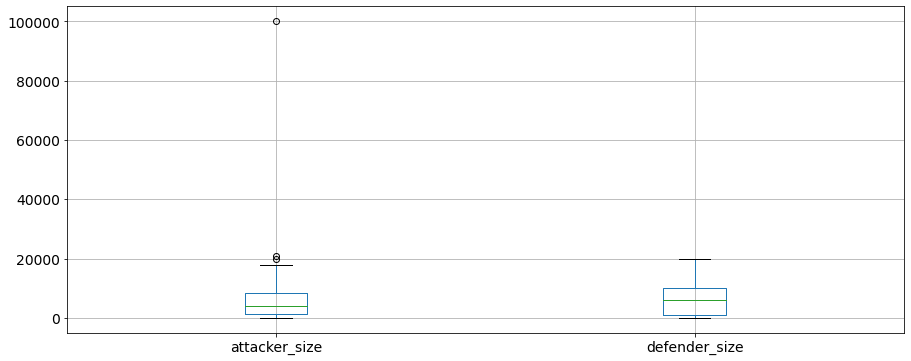

In [10]:
# Analizando as variáveis com boxplot
df.boxplot(column = ['attacker_size','defender_size'])

In [11]:
# Preencherei a variável 'defender_size' com a média dos valores. Na variável 'attacker_size' utilizarei a mediana, para evitar a interferência dos outliers.
df['defender_size'] = df['defender_size'].fillna(df['defender_size'].mean())
df['attacker_size'] = df['attacker_size'].fillna(df['attacker_size'].median())

Preenchendo alguns valores NaN da batalha 'Siege of Winterfell', me baseando em lógica e em meus conhecimentos sobre os livros 

In [12]:
df.loc[df['name'] == 'Siege of Winterfell','battle_type' ] = 'siege'
df.loc[df['name'] == 'Siege of Winterfell','major_death' ] = 0
df.loc[df['name'] == 'Siege of Winterfell','major_capture' ] = 0

Preenchendo valores NaN de variáveis em que o valor NaN representa a ausência de valor

In [13]:
df.defender_king = df.defender_king.fillna('without king')
df.attacker_king = df.attacker_king.fillna('without king')

df.attacker_commander = df.attacker_commander.fillna('without comander')
df.defender_commander = df.defender_commander.fillna('without comander')

In [14]:
# O campo 'defender1', quando for NA, quer dizer que não houve ninguem importante defendendo, então colocarei 'locals',
# pois foi um ataque ao povo local.
df.defender_1 = df.defender_1.fillna('locals')

In [15]:
df.location = df.location.fillna('other')

# Análise dos dados

### Quantidade de batalhas por ano

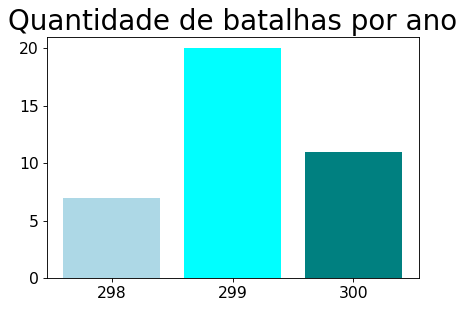

In [16]:
vc = df.year.value_counts()
df2 = pd.DataFrame({'ano':vc.index, 'batalhas':vc.values}).sort_values(by=['ano'])
a = df2['ano'].astype(str)
b = df2['batalhas']
plt.figure(figsize=(6, 4), dpi = 80)
plt.bar(a, b, color=['lightblue','aqua','teal'])
plt.title('Quantidade de batalhas por ano',fontsize=25)

plt.show()

### Quantidade de batalhas com captura/morte de personagens principais por ano

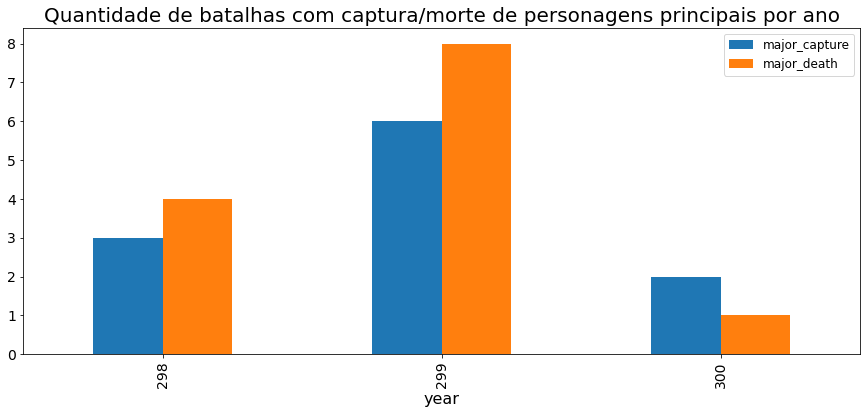

In [17]:
vc4 = df.groupby('year')['major_capture','major_death'].sum().reset_index(level=0).sort_values(by=['year'])
vc4.plot.bar(x = 'year', y = ['major_capture', 'major_death'], 
             title = 'Quantidade de batalhas com captura/morte de personagens principais por ano').title.set_size(20)



### Quantidade de batalha em cada região

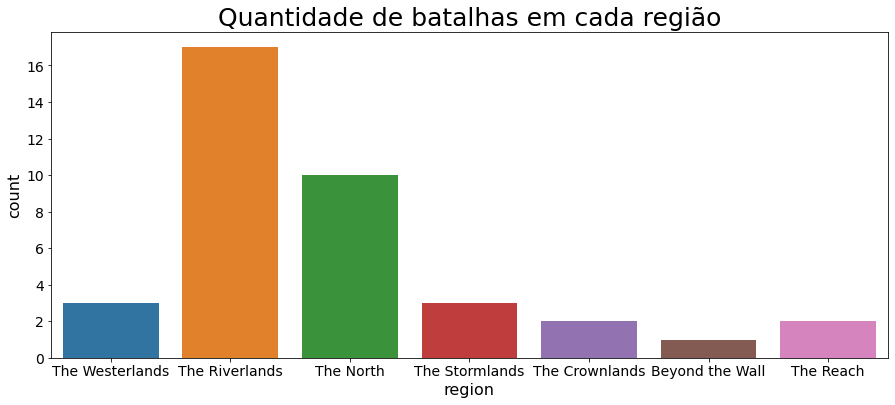

In [18]:
fig, axis1 = plt.subplots(1,1)
axis1.set_title("Quantidade de batalhas em cada região", fontsize = 25)
sns.countplot(x='region', data=df, ax=axis1)
plt.show()

### Quantidade de batalhas com captura/morte de personagens principais por região

In [19]:
# Criando data set com as informações necessárias
data = df.groupby('region').sum()[['major_death', 'major_capture']]

# criando coluna com a quantidade de vezes que cada região aparece no dataset
p = pd.concat([data, df.region.value_counts().to_frame()], axis = 1).sort_values('region', ascending = False).copy( 
    deep = True)
p = p.rename({'major_death': 'Quantidade_mortes_importantes', 'major_capture': 'Quantidade_capturas_importantes','region': 'Quantidade_batalhas_na_região' }, axis=1)
p

,Quantidade_mortes_importantes,Quantidade_capturas_importantes,Quantidade_batalhas_na_região
The Riverlands,6.0,6.0,17
The North,1.0,2.0,10
The Stormlands,1.0,0.0,3
The Westerlands,2.0,1.0,3
The Crownlands,2.0,1.0,2
The Reach,0.0,0.0,2
Beyond the Wall,1.0,1.0,1


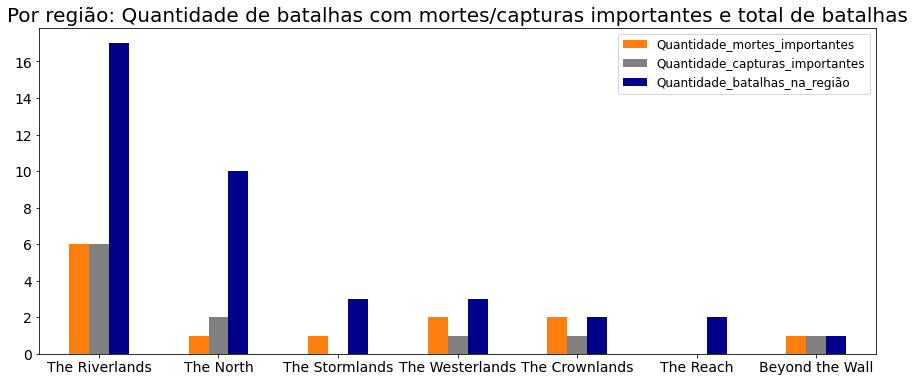

In [20]:
# Criando o plot
p.plot.bar(color = [sns.color_palette()[1], "grey", "darkblue"], rot = 0, 
           title = 'Por região: Quantidade de batalhas com mortes/capturas importantes e total de batalhas').title.set_size(20)



## Análise no impacto do tamanho dos exércitos no resultado de batalha 

In [21]:
# Criando o dataset
data = pd.DataFrame({'ATK-DEF':df.attacker_size - df.defender_size, 'attacker_outcome':df['attacker_outcome']})
data = data.dropna()
data.head()
                    

,ATK-DEF,attacker_outcome
0,11000.0,win
1,3880.0,win
2,5000.0,win
3,-2000.0,loss
4,-4125.0,win


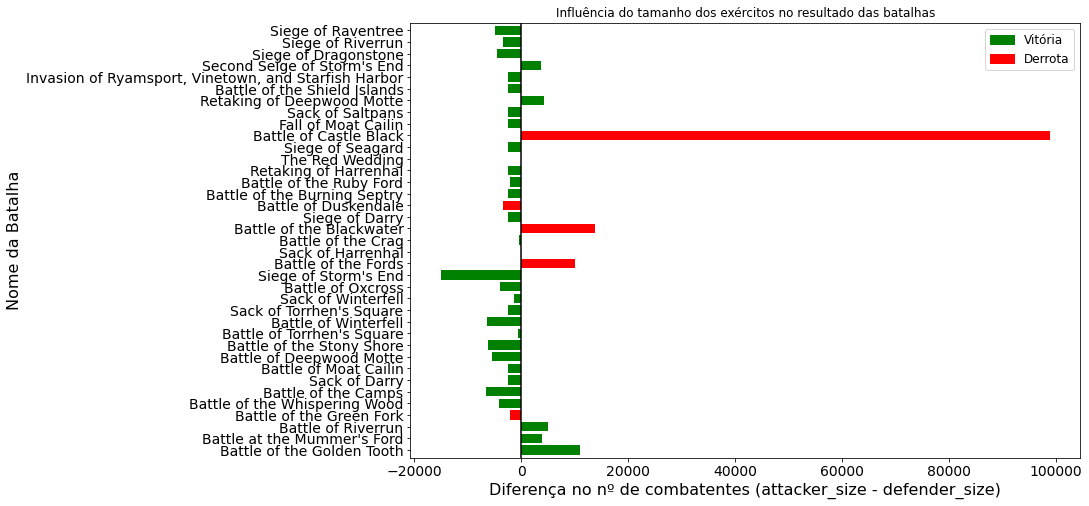

In [22]:
# Criando o plot
p = data['ATK-DEF'].plot.barh(figsize = (12, 8), width = .8, 
                              color = ['green' if x == "win" else 'red'  for x in data.attacker_outcome.values])
_ = p.legend(handles = [mpatches.Patch(color = 'green', label = "Vitória", aa = True),
                        mpatches.Patch(color = 'red', label = "Derrota", aa = True)])
_ = p.axvline(0, color = 'k'), p.set(yticklabels = df.name.iloc[data.index].values, 
                                     xlabel = "Diferença no nº de combatentes (attacker_size - defender_size)", 
                                     ylabel = "Nome da Batalha", title = 'Influência do tamanho dos exércitos no resultado das batalhas')

Interessante perceber que a maioria das vitórias ocorreu com menor número de atacantes

## Análise do impacto do tipo de combate no resultado de batalha

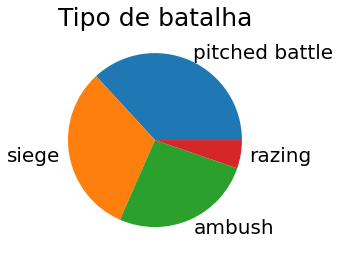

In [23]:
# Quantidade de batalha de cada tipo
plt.figure(figsize=[8,4])
df.battle_type.value_counts().plot(kind='pie',fontsize = 20)
plt.title("Tipo de batalha", fontsize = 25) 
plt.ylabel("") 
plt.show()

In [24]:
# Quantidade de vitórias por tipo de batalha
a = df.battle_type[df['attacker_outcome'] == 'win'].value_counts()
b = pd.DataFrame({'batalha':a.index, 'vitórias':a.values})
b

,batalha,vitórias
0,pitched battle,10
1,ambush,10
2,siege,10
3,razing,2


In [25]:
# Quantidade de derrotas por tipo de bartalhas
c = df.battle_type[df['attacker_outcome'] == 'loss'].value_counts()
d = pd.DataFrame({'batalha':c.index, 'derrotas':c.values})
d

,batalha,derrotas
0,pitched battle,4
1,siege,1


In [26]:
# Juntando os datasets e criando a coluna 'score', que será o número de virórias - o de derrotas derrotas
data = b.merge(d, on='batalha', how='left')
data['derrotas'] = data['derrotas'].fillna(0)
data['score'] = data['vitórias'] - data['derrotas']
data = data.sort_values('score', ascending = False)
data

,batalha,vitórias,derrotas,score
1,ambush,10,0.0,10.0
2,siege,10,1.0,9.0
0,pitched battle,10,4.0,6.0
3,razing,2,0.0,2.0


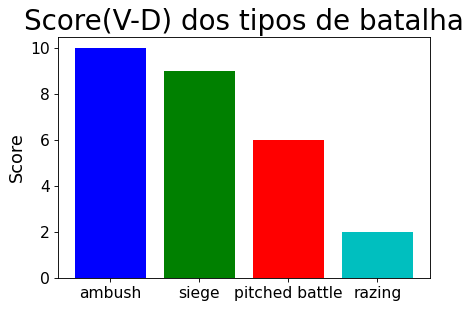

In [27]:
# Criando o plot
a = data['batalha']
b = data['score']
plt.figure(figsize=(6, 4), dpi = 80)
plt.bar(a, b, color = ['b','g', 'r', 'c'])
plt.ylabel('Score')
plt.title('Score(V-D) dos tipos de batalha',fontsize = 25)

plt.show()

E a emboscada se mostra o melhor tipo de batalha para o atacante. Covardes são recompensados =p

###  Análise dos atacantes:


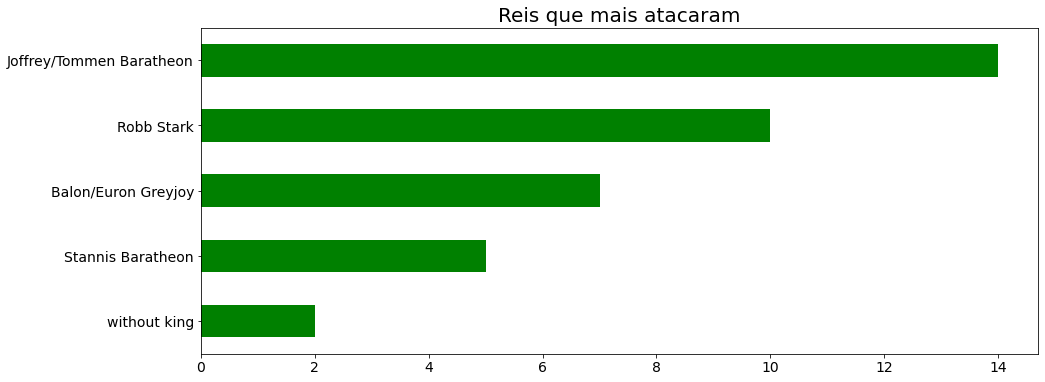

In [28]:
# Reis que mais atacaram
df.attacker_king.value_counts().sort_values().plot.barh(title = 'Reis que mais atacaram', color ='g').title.set_size(20)


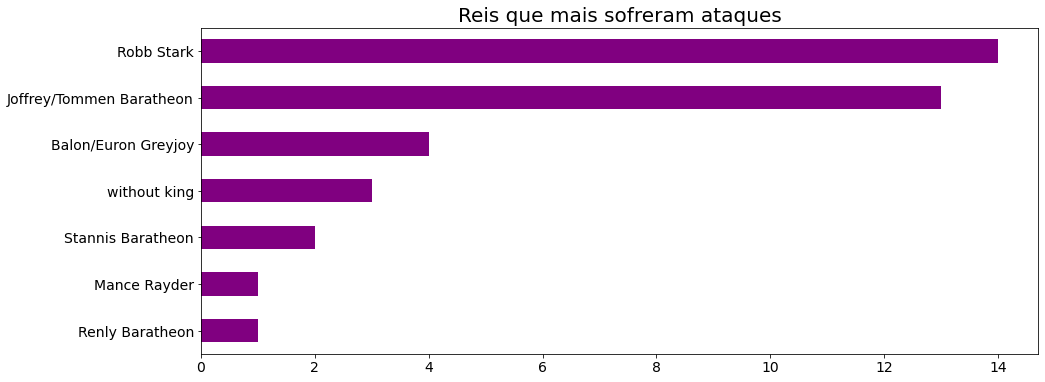

In [29]:
# Reis que mais sofreram ataques
df.defender_king.value_counts().sort_values().plot.barh(title = 'Reis que mais sofreram ataques', color ='purple').title.set_size(20)

## Confrontos mais frequentes

In [30]:
datax =df[['attacker_king','defender_king']].value_counts().sort_values()
datax

attacker_king             defender_king           
Balon/Euron Greyjoy       Balon/Euron Greyjoy          1
Joffrey/Tommen Baratheon  Balon/Euron Greyjoy          1
                          without king                 1
Robb Stark                Balon/Euron Greyjoy          1
Stannis Baratheon         Balon/Euron Greyjoy          1
                          Mance Rayder                 1
                          Renly Baratheon              1
Balon/Euron Greyjoy       Joffrey/Tommen Baratheon     2
Joffrey/Tommen Baratheon  Stannis Baratheon            2
Stannis Baratheon         Joffrey/Tommen Baratheon     2
without king              without king                 2
Balon/Euron Greyjoy       Robb Stark                   4
Robb Stark                Joffrey/Tommen Baratheon     9
Joffrey/Tommen Baratheon  Robb Stark                  10
dtype: int64

In [31]:
atk = []
defen = []
for i in datax.index:
    atk.append(i[0])
    defen.append(i[1])

data = pd.DataFrame({'atacante':atk, 'defensor':defen,
                     'quantidade_batalhas': datax.values})
data

,atacante,defensor,quantidade_batalhas
0,Balon/Euron Greyjoy,Balon/Euron Greyjoy,1
1,Joffrey/Tommen Baratheon,Balon/Euron Greyjoy,1
2,Joffrey/Tommen Baratheon,without king,1
3,Robb Stark,Balon/Euron Greyjoy,1
4,Stannis Baratheon,Balon/Euron Greyjoy,1
5,Stannis Baratheon,Mance Rayder,1
6,Stannis Baratheon,Renly Baratheon,1
7,Balon/Euron Greyjoy,Joffrey/Tommen Baratheon,2
8,Joffrey/Tommen Baratheon,Stannis Baratheon,2
9,Stannis Baratheon,Joffrey/Tommen Baratheon,2


In [32]:
data['confronto'] = data.atacante + '   VS.  ' + data.defensor
data

,atacante,defensor,quantidade_batalhas,confronto
0,Balon/Euron Greyjoy,Balon/Euron Greyjoy,1,Balon/Euron Greyjoy VS. Balon/Euron Greyjoy
1,Joffrey/Tommen Baratheon,Balon/Euron Greyjoy,1,Joffrey/Tommen Baratheon VS. Balon/Euron Gr...
2,Joffrey/Tommen Baratheon,without king,1,Joffrey/Tommen Baratheon VS. without king
3,Robb Stark,Balon/Euron Greyjoy,1,Robb Stark VS. Balon/Euron Greyjoy
4,Stannis Baratheon,Balon/Euron Greyjoy,1,Stannis Baratheon VS. Balon/Euron Greyjoy
5,Stannis Baratheon,Mance Rayder,1,Stannis Baratheon VS. Mance Rayder
6,Stannis Baratheon,Renly Baratheon,1,Stannis Baratheon VS. Renly Baratheon
7,Balon/Euron Greyjoy,Joffrey/Tommen Baratheon,2,Balon/Euron Greyjoy VS. Joffrey/Tommen Bara...
8,Joffrey/Tommen Baratheon,Stannis Baratheon,2,Joffrey/Tommen Baratheon VS. Stannis Baratheon
9,Stannis Baratheon,Joffrey/Tommen Baratheon,2,Stannis Baratheon VS. Joffrey/Tommen Baratheon


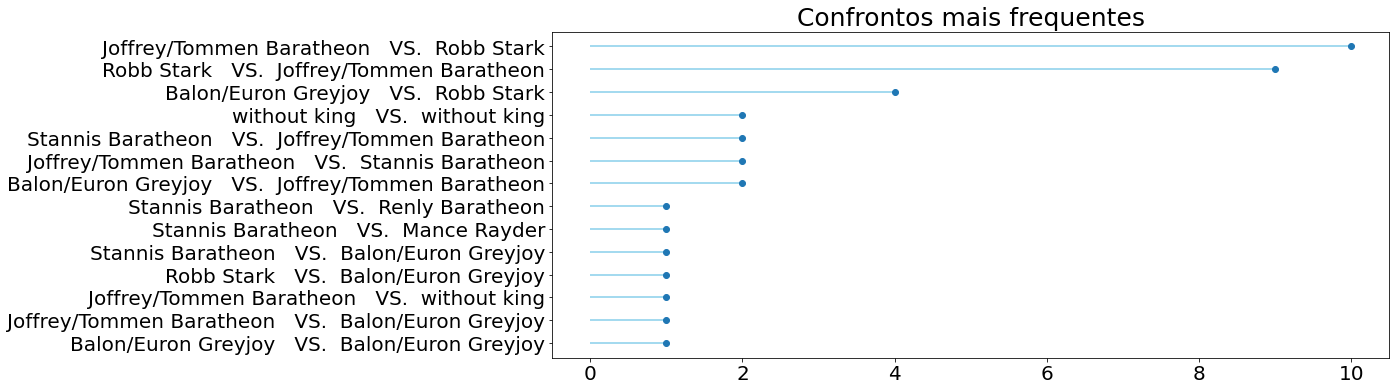

In [33]:
# Plotando o gráfico
a = data['confronto']
b = data['quantidade_batalhas']
plt.hlines(a, xmin = 0, xmax=b, color='skyblue')
plt.plot(b,a,"o")
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.title('Confrontos mais frequentes', fontsize=25)

plt.show()

## Quem mais ganhou batalhas


### atacando:

In [34]:
# Criando conjunto de dados
data = df[df['attacker_outcome'] == 'win']
data = data.attacker_king.value_counts()
data

Joffrey/Tommen Baratheon    13
Robb Stark                   8
Balon/Euron Greyjoy          7
Stannis Baratheon            2
without king                 2
Name: attacker_king, dtype: int64

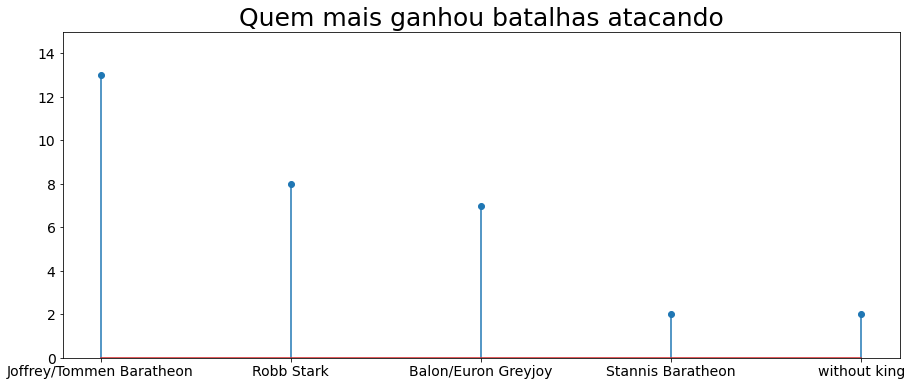

In [35]:
# Plotando o gráfico
a = data.index
b = data.values
plt.stem(a, b)
plt.ylim(0, 15)
plt.title('Quem mais ganhou batalhas atacando', fontsize=25)
plt.show()

In [36]:
# defendendo
data = df[df['attacker_outcome'] == 'loss']
data = data.defender_king.value_counts()
data

Joffrey/Tommen Baratheon    3
Robb Stark                  1
Mance Rayder                1
Name: defender_king, dtype: int64

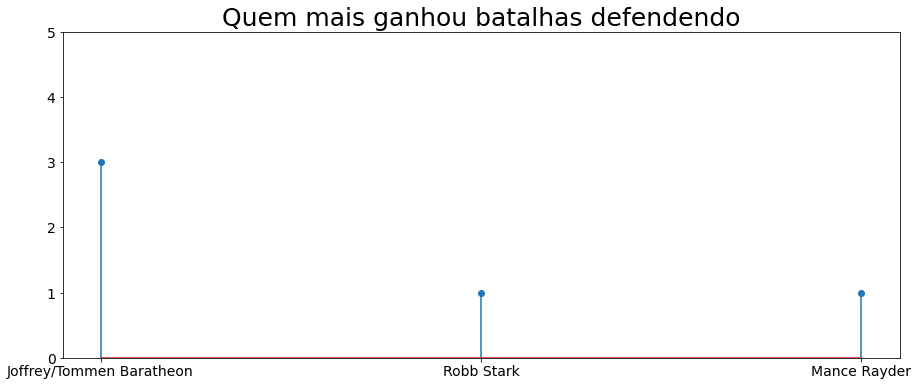

In [37]:
# Plotando o gráfico
a = data.index
b = data.values
plt.stem(a, b)
plt.ylim(0, 5)
plt.title('Quem mais ganhou batalhas defendendo', fontsize=25)
plt.show()

### Quem mais perdeu batalhas

In [38]:
# atacando
at = df[df['attacker_outcome'] == 'loss']
at = at.attacker_king.value_counts()
at = pd.DataFrame({'king':at.index, 'loss_at' : at.values})
at

,king,loss_at
0,Robb Stark,2
1,Stannis Baratheon,2
2,Joffrey/Tommen Baratheon,1


In [39]:
# Defendendo
de = df[df['attacker_outcome'] == 'win']
de = de.defender_king.value_counts()
de = pd.DataFrame({'king':de.index, 'loss_de' : de.values})
de

,king,loss_de
0,Robb Stark,13
1,Joffrey/Tommen Baratheon,9
2,Balon/Euron Greyjoy,4
3,without king,3
4,Stannis Baratheon,2
5,Renly Baratheon,1


In [40]:
# Total de derrotas
loss = de.merge(at, on='king', how='left')
loss['loss_at'] = loss['loss_at'].fillna(0)
loss['loss'] = loss['loss_at'] + loss['loss_de']


loss

,king,loss_de,loss_at,loss
0,Robb Stark,13,2.0,15.0
1,Joffrey/Tommen Baratheon,9,1.0,10.0
2,Balon/Euron Greyjoy,4,0.0,4.0
3,without king,3,0.0,3.0
4,Stannis Baratheon,2,2.0,4.0
5,Renly Baratheon,1,0.0,1.0


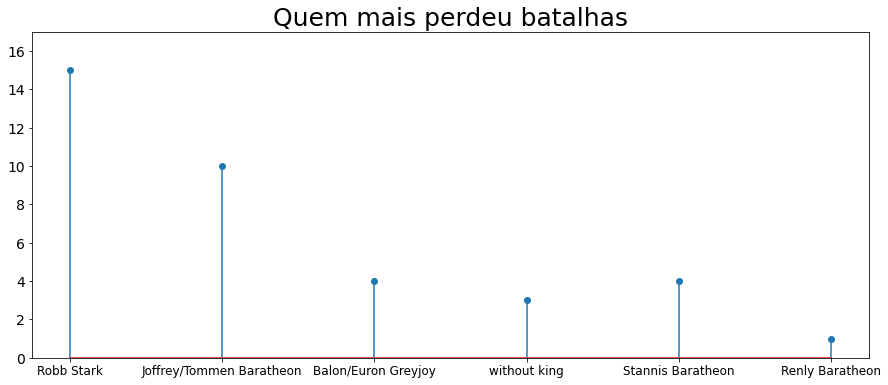

In [41]:
# Plotando
a = loss.king
b = loss.loss
plt.stem(a, b)
plt.ylim(0, 17)
plt.xticks(fontsize = 12)
plt.title('Quem mais perdeu batalhas', fontsize=25)
plt.show()



### E assim termino meu projeto de Analytics com Game of Thrones!

Dúvidas, sugestões e críticas: entre em contato!   :)
e-mail: pabloaguiar92@hotmail.com linkedin: https://www.linkedin.com/in/pablo-aguiar-raposo-71b6b5139/ 
github: https://github.com/Pablo-aguiarr